# Tesla (TSLA) Stock Price prediction using Facebook Prophet

## Importing all the necessary Libraries

In [ ]:
!pip install prophet



In [1]:
import prophet

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


In [3]:
 #Initializing Plotly

import plotly.io as pio
pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [4]:
df = pd.read_csv('/content/TSLA (3).csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-11,17.886667,18.033333,17.706667,17.894667,17.894667,147538500
1,2019-04-12,18.014668,18.129999,17.788668,17.846666,17.846666,101190000
2,2019-04-15,17.908667,17.925333,17.242001,17.758667,17.758667,150579000
3,2019-04-16,17.716667,18.333332,17.648001,18.224001,18.224001,109093500
4,2019-04-17,18.316668,18.319332,17.902666,18.082001,18.082001,76897500


In [6]:
df.shape

(1258, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,180.422586,184.449174,176.072358,180.356812,180.356812,1.325474e+08
std,102.333106,104.492734,99.868809,102.173296,102.173296,8.452409e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,93.666832,95.766668,91.025667,93.330669,93.330669,8.042828e+07
50%,203.660004,208.220001,198.510002,203.351670,203.351670,1.085552e+08
75%,251.392498,256.570000,246.292503,251.844997,251.844997,1.542624e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [11]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [12]:
px.area(df, x='Date', y='Close')

In [13]:
px.line(df, x='Date', y='Close')

In [14]:
px.area(df, x='Date', y='Volume')

In [15]:
px.box(df, y='Close')

- The Minimum Close is 11.93
- The Maximum close is 293.34


The first quartile ( q1 ) = 92.165
The third quartile ( q3 ) = 251.86

median = 203




---


- The closing prices of the financial instrument or stock vary between 11.93 and 293.34.
- The data seems to be positively skewed, The median (203) is closer to the third quartile (Q3 = 251.86) than to the first quartile (Q1 = 92.165). This suggests that the higher closing prices are more prevalent in the dataset compared to the lower closing prices. This suggests that there are more lower closing prices than higher ones.
- The interquartile range (Q3 - Q1) is 251.86 - 92.165 = 159.695. This indicates that the middle 50% of the data falls within this range, showing the dispersion of the central data values.


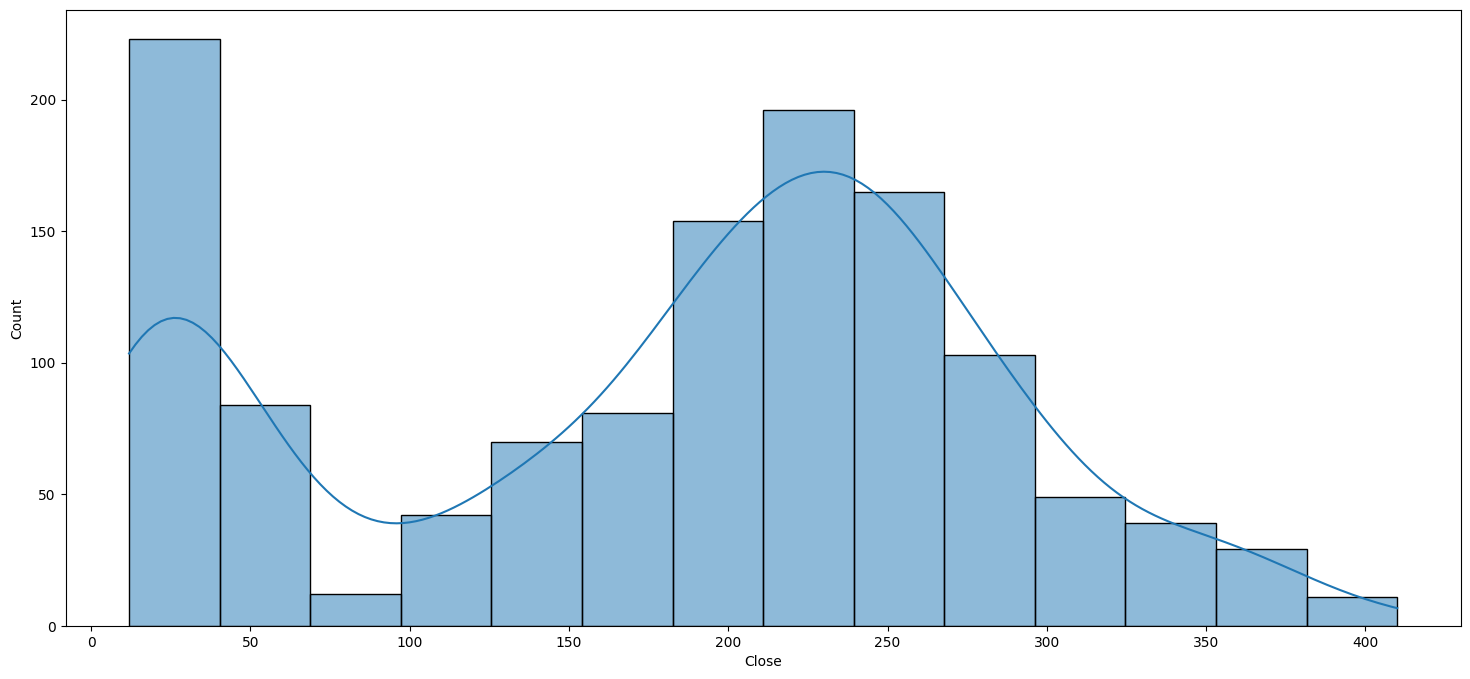

In [16]:
import seaborn as sns
plt.figure(figsize=(18,8))
sns.histplot(df['Close'], kde=True)
plt.show()

The distribution of closing prices appears positively skewed, with more data points clustered towards the lower end of the range and a longer tail towards higher values.

In [17]:
df['Date'] = pd.to_datetime(df['Date'])


In [18]:
def time_extraction(data):
  data['year'] = data['Date'].dt.year
  data['month'] = data['Date'].dt.month
  data['day'] = data['Date'].dt.day
  data['day_in_w'] = data['Date'].dt.dayofweek
  return data


In [19]:
data = time_extraction(df)

data

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,day_in_w
0,2019-04-11,17.886667,18.033333,17.706667,17.894667,17.894667,147538500,2019,4,11,3
1,2019-04-12,18.014668,18.129999,17.788668,17.846666,17.846666,101190000,2019,4,12,4
2,2019-04-15,17.908667,17.925333,17.242001,17.758667,17.758667,150579000,2019,4,15,0
3,2019-04-16,17.716667,18.333332,17.648001,18.224001,18.224001,109093500,2019,4,16,1
4,2019-04-17,18.316668,18.319332,17.902666,18.082001,18.082001,76897500,2019,4,17,2
...,...,...,...,...,...,...,...,...,...,...,...
1253,2024-04-04,170.070007,177.190002,168.009995,171.110001,171.110001,123162000,2024,4,4,3
1254,2024-04-05,169.080002,170.860001,160.509995,164.899994,164.899994,141250700,2024,4,5,4
1255,2024-04-08,169.339996,174.500000,167.789993,172.979996,172.979996,104423300,2024,4,8,0
1256,2024-04-09,172.910004,179.220001,171.919998,176.880005,176.880005,103232700,2024,4,9,1


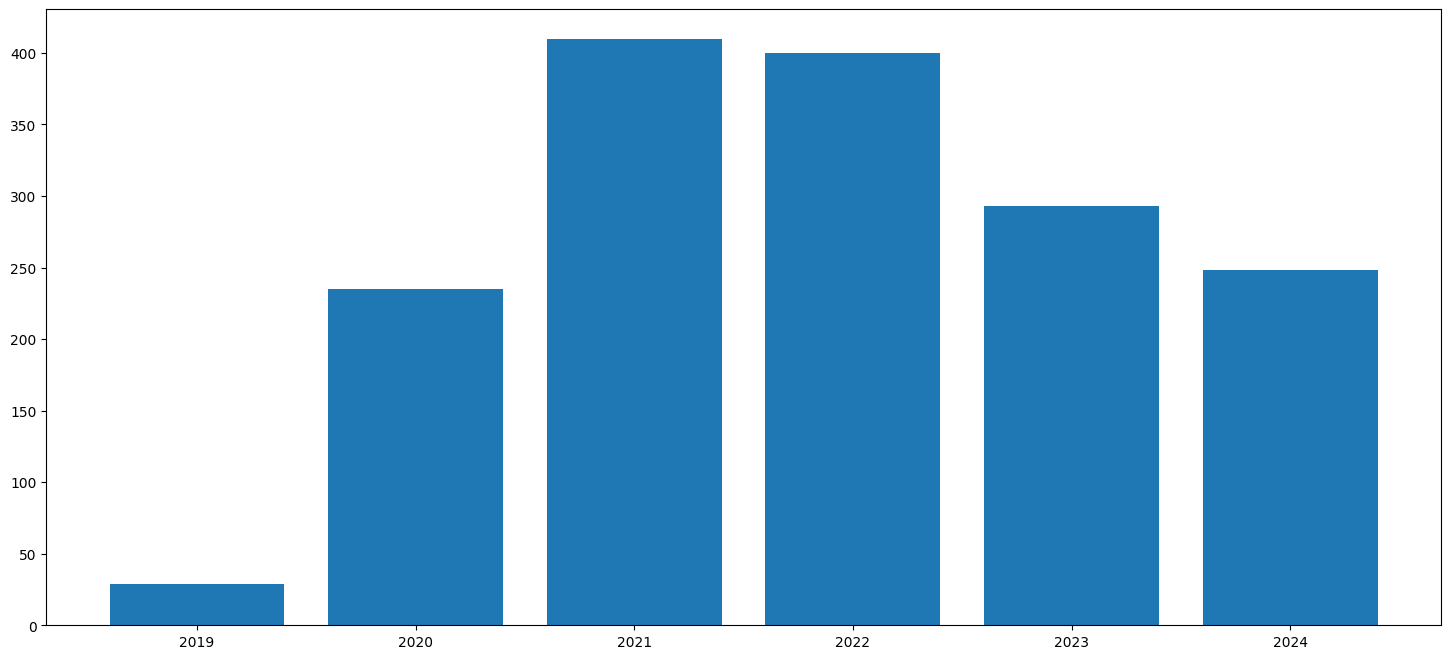

In [20]:
plt.figure(figsize=(18,8))
plt.bar(data['year'],data['Close'] )
plt.show()

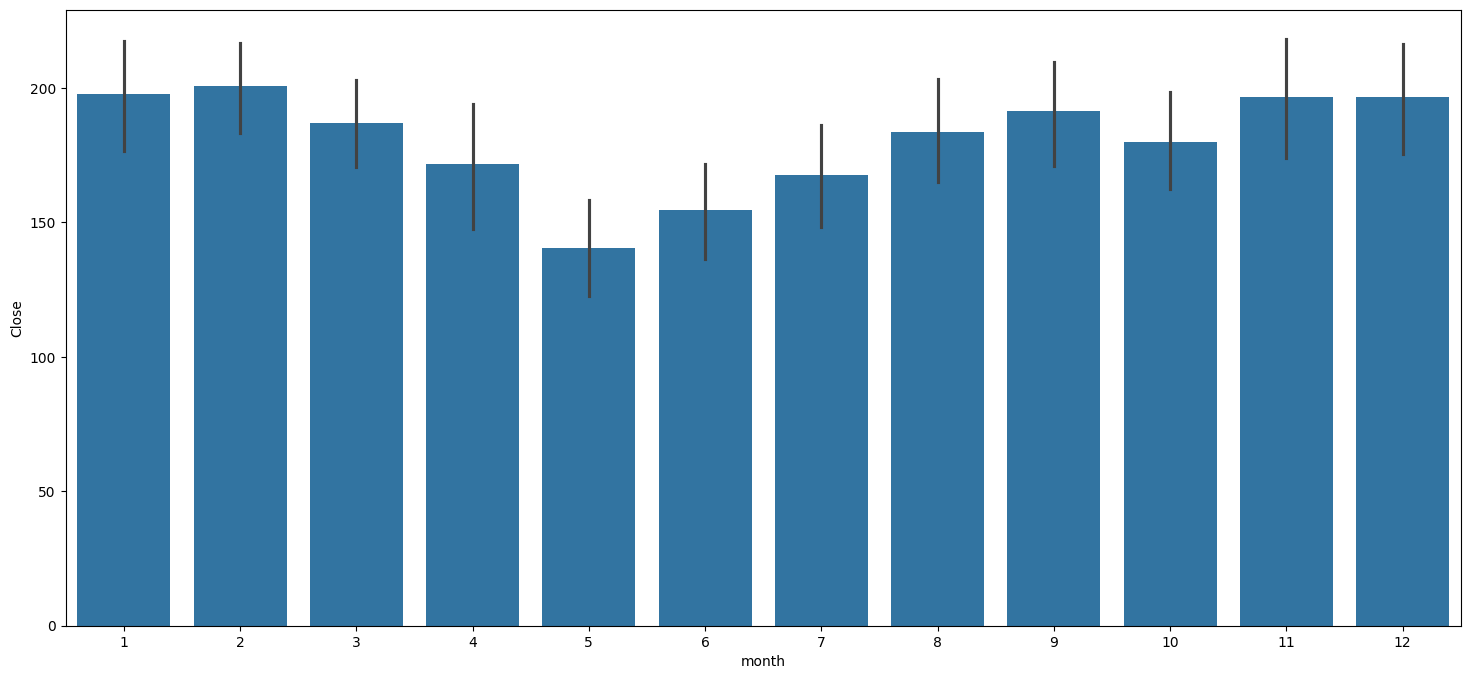

In [21]:
plt.figure(figsize=(18,8))
sns.barplot(data=data, x='month', y='Close')
plt.show()

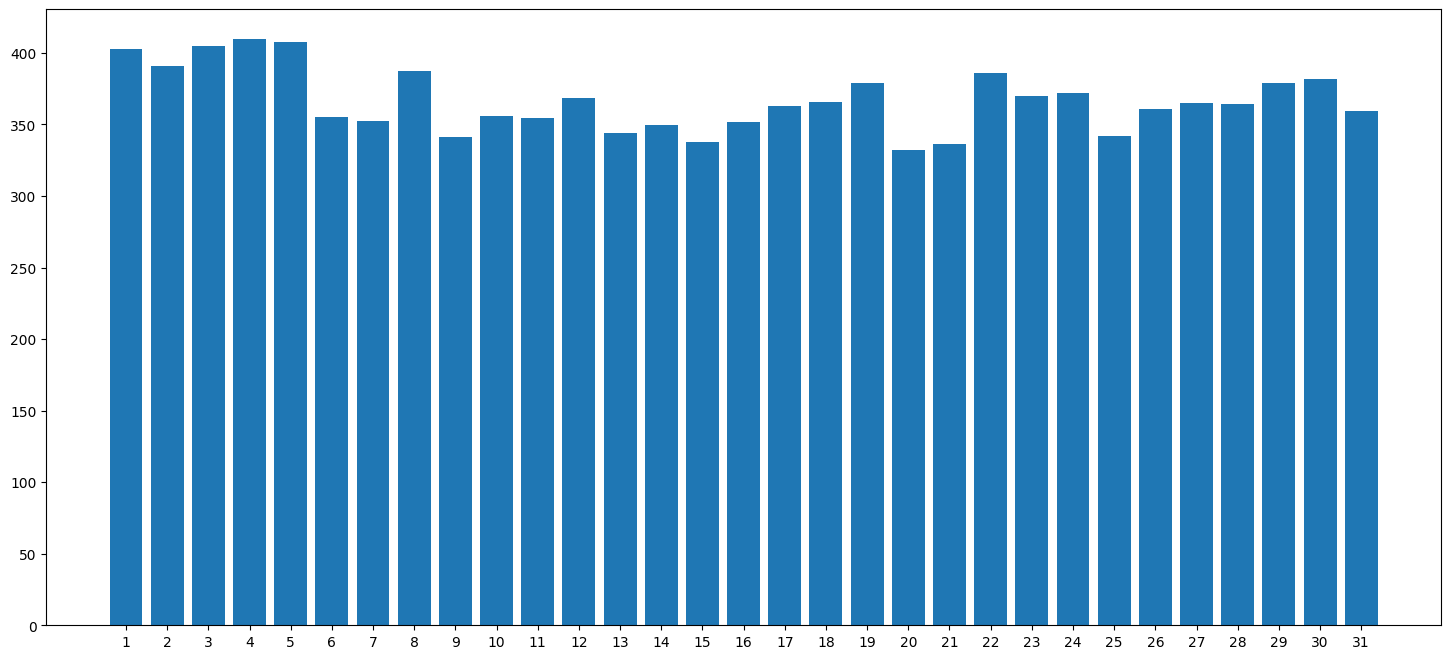

In [22]:
plt.figure(figsize=(18,8))
plt.bar(data['day'],data['Close'] )
plt.xticks(range(1,32))
plt.show()

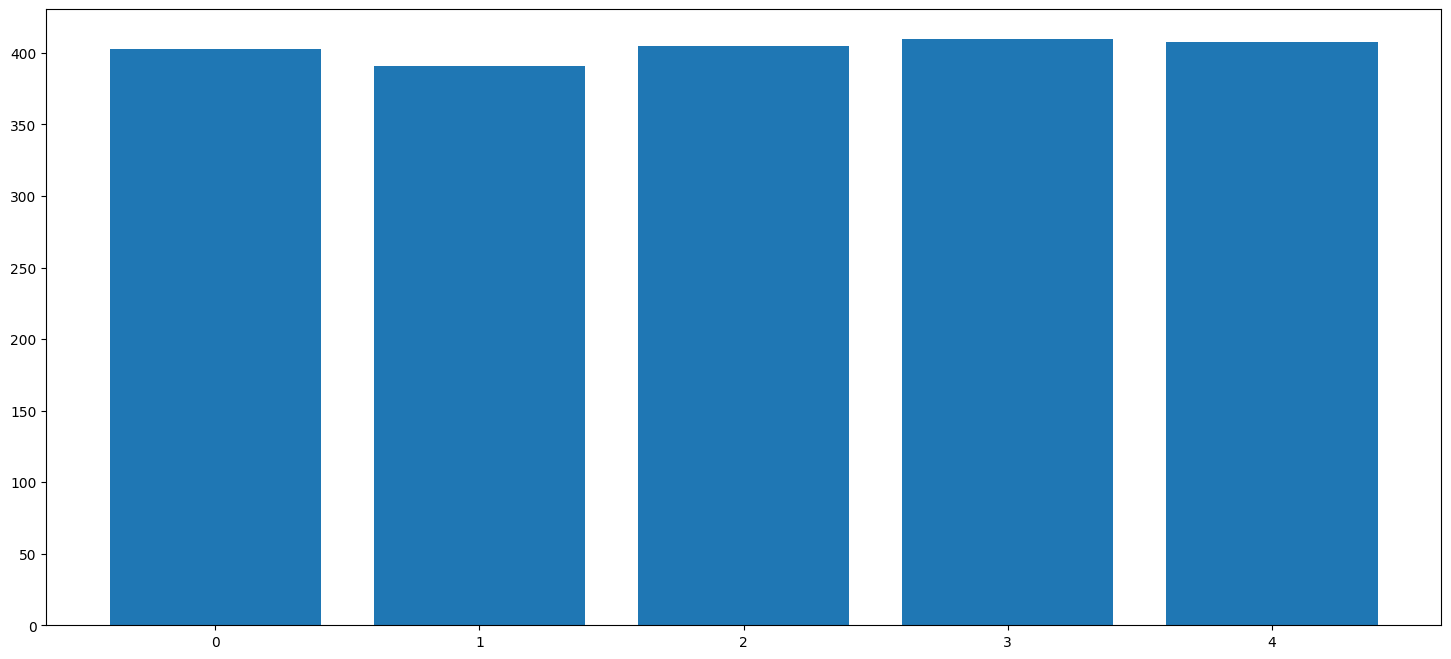

In [23]:
plt.figure(figsize=(18,8))
plt.bar(data['day_in_w'],data['Close'] )
plt.show()

Weekends are not included in the day of week that's why is from 0 to 4
( Monday to Friday )

# Understanding Facebook Prophet

## Data Preperation

In [24]:
columns = ['Date', 'Close']

ndf = df[columns]

In [25]:
ndf

,Date,Close
0,2019-04-11,17.894667
1,2019-04-12,17.846666
2,2019-04-15,17.758667
3,2019-04-16,18.224001
4,2019-04-17,18.082001
...,...,...
1253,2024-04-04,171.110001
1254,2024-04-05,164.899994
1255,2024-04-08,172.979996
1256,2024-04-09,176.880005


In [26]:
prophet_df = ndf.rename(columns={'Date' : 'ds', 'Close' : 'y'})

In [27]:
prophet_df

,ds,y
0,2019-04-11,17.894667
1,2019-04-12,17.846666
2,2019-04-15,17.758667
3,2019-04-16,18.224001
4,2019-04-17,18.082001
...,...,...
1253,2024-04-04,171.110001
1254,2024-04-05,164.899994
1255,2024-04-08,172.979996
1256,2024-04-09,176.880005


## Creating Facebook Prophet Model

In [28]:
from prophet import Prophet

In [29]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp287ixp1n/qfc4hnqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp287ixp1n/28s345vl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47685', 'data', 'file=/tmp/tmp287ixp1n/qfc4hnqg.json', 'init=/tmp/tmp287ixp1n/28s345vl.json', 'output', 'file=/tmp/tmp287ixp1n/prophet_modelaz8oz1jt/prophet_model-20240411164925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:49:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:49:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

Forecast 4 months of data

120 days

In [30]:
future_df = m.make_future_dataframe(periods=120)

forecast = m.predict(future_df)

In [31]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-04-11,16.430655,-25.442760,56.550189,16.430655,16.430655,-2.188777,-2.188777,-2.188777,-0.636115,-0.636115,-0.636115,-1.552662,-1.552662,-1.552662,0.0,0.0,0.0,14.241877
1,2019-04-12,16.439807,-25.928185,55.976646,16.439807,16.439807,-2.578694,-2.578694,-2.578694,-1.137621,-1.137621,-1.137621,-1.441073,-1.441073,-1.441073,0.0,0.0,0.0,13.861113
2,2019-04-15,16.467264,-25.070165,57.101195,16.467264,16.467264,-0.621724,-0.621724,-0.621724,0.668832,0.668832,0.668832,-1.290556,-1.290556,-1.290556,0.0,0.0,0.0,15.845540
3,2019-04-16,16.476417,-26.285812,53.276459,16.476417,16.476417,-1.603817,-1.603817,-1.603817,-0.293839,-0.293839,-0.293839,-1.309978,-1.309978,-1.309978,0.0,0.0,0.0,14.872599
4,2019-04-17,16.485569,-19.210974,54.386989,16.485569,16.485569,-1.371471,-1.371471,-1.371471,-0.000134,-0.000134,-0.000134,-1.371337,-1.371337,-1.371337,0.0,0.0,0.0,15.114098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,2024-08-04,231.007079,195.173591,279.706520,221.612937,240.101086,5.937658,5.937658,5.937658,0.699438,0.699438,0.699438,5.238220,5.238220,5.238220,0.0,0.0,0.0,236.944738
1374,2024-08-05,231.063552,190.867291,280.637316,221.465872,240.349071,6.094077,6.094077,6.094077,0.668832,0.668832,0.668832,5.425245,5.425245,5.425245,0.0,0.0,0.0,237.157629
1375,2024-08-06,231.120025,193.797932,279.328935,221.391023,240.581940,5.320951,5.320951,5.320951,-0.293839,-0.293839,-0.293839,5.614790,5.614790,5.614790,0.0,0.0,0.0,236.440976
1376,2024-08-07,231.176499,195.392726,280.005017,221.294508,240.753354,5.802872,5.802872,5.802872,-0.000134,-0.000134,-0.000134,5.803006,5.803006,5.803006,0.0,0.0,0.0,236.979371


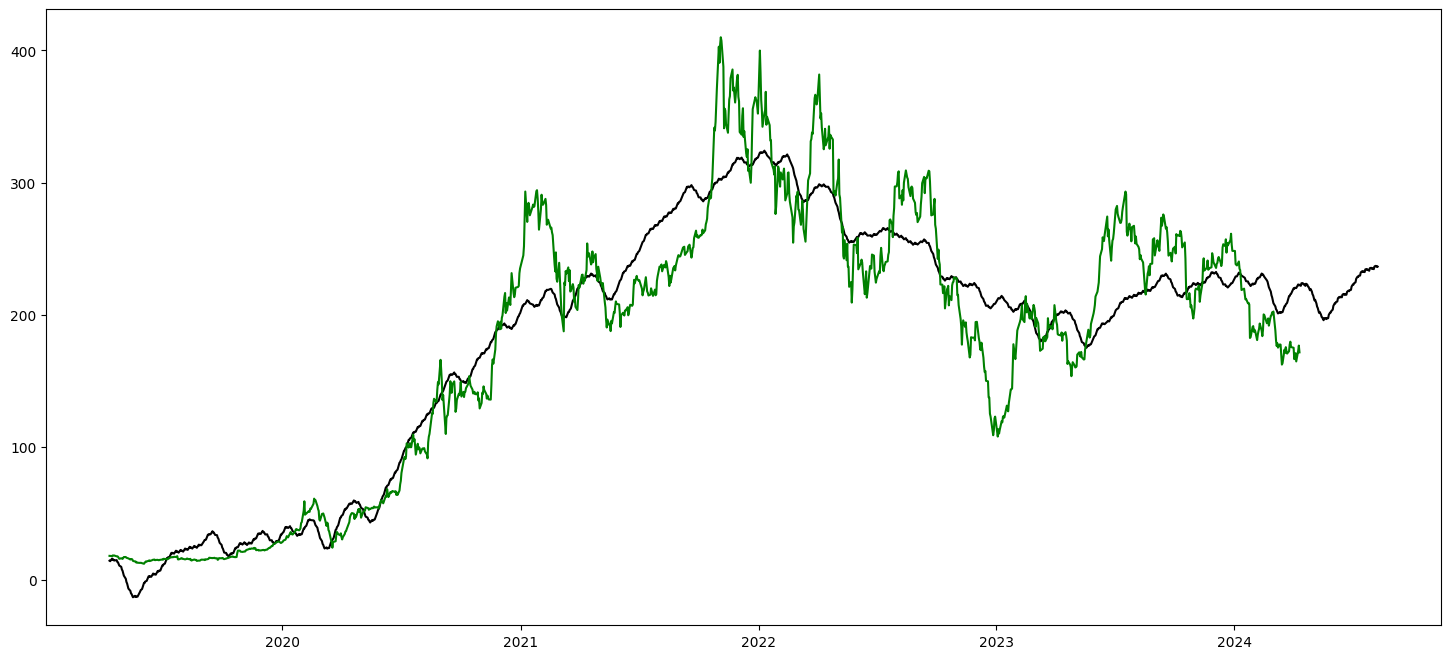

In [32]:
plt.figure(figsize=(18,8))
plt.plot(forecast['ds'], forecast['yhat'], color='black')
plt.plot(prophet_df['ds'], prophet_df['y'], color='green')
plt.show()

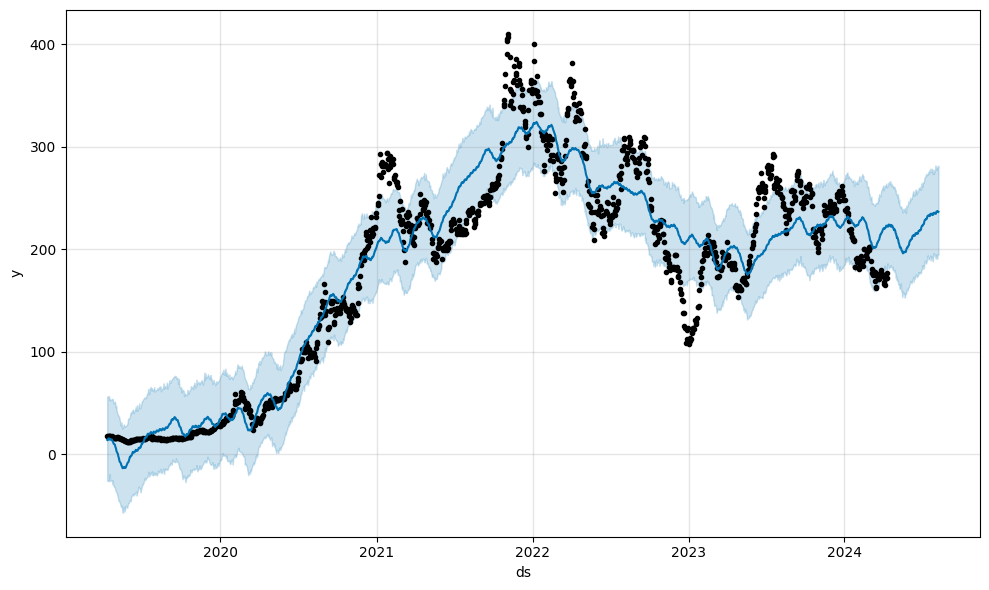

In [33]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

Black dots are the actual close prices , and the blue line is the predicted prices

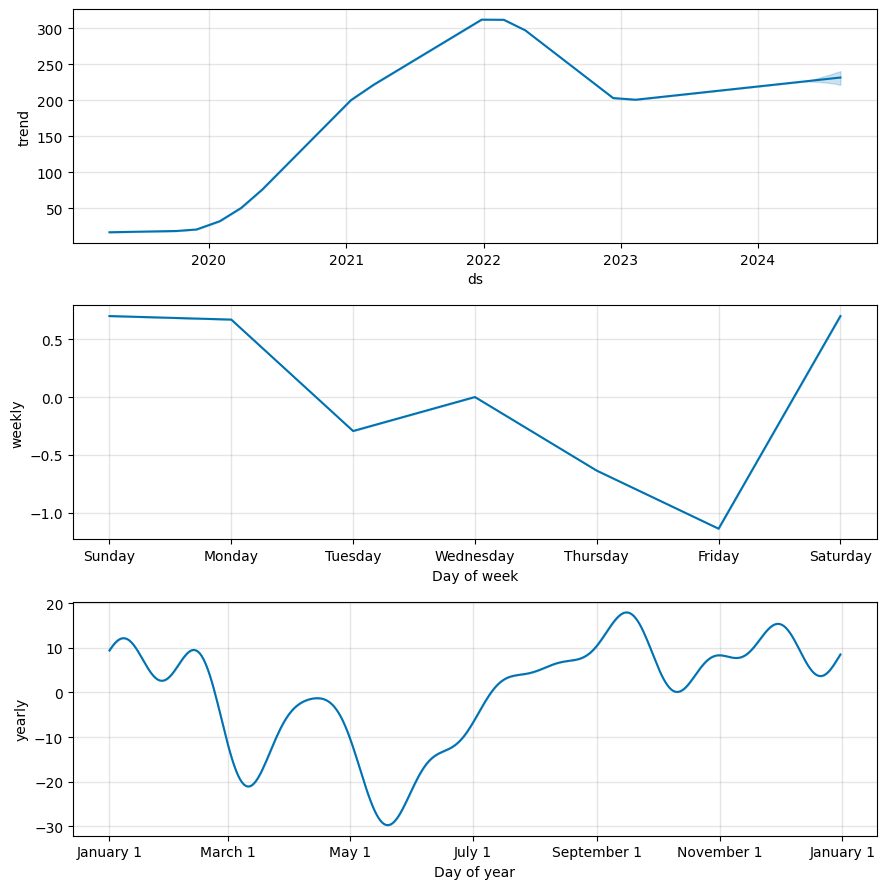

In [58]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [59]:
from google.colab import files

forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
from joblib import dump, load

# Assuming 'm' is your trained Prophet model
dump(m, 'prophet_model.pkl')

['prophet_model.pkl']